In [1]:
# Внимание!!! Важно, что бы файлы с данными и исполняемый файл находились в одной папке, 
# тогда пути к тестовым и тренировочным наборам будут содержать только имена файлов.
# 
# В пути к тренировочным и тестовым данным запрежается использовать абсалютную адресацию, 
# то есть адресацию, в которой присутствуют имена папок. Путь должен содержать только имя файла.
#
# Напоминание: под моделью машинного обучения понимаются все действия с исходными данными, 
# которые необходимо произвести, что бы сопоставить признаки целевому значению.

### Область работы 1 (библиотеки)

In [2]:
# Данный блок в области 1 выполняется преподавателем
# 
# данный блок предназначен только для подключения необходимых библиотек
# запрещается подключать библиотеки в других блоках
#
# установка дополнительных библиотек размещается прямо здесь (обязательно закоментированы)
#
# pip install

In [1]:
import pandas as pd
import numpy as np
import warnings

from matplotlib import pyplot as plt
import seaborn as sns

# pip install phik --q
# from phik.report import plot_correlation_matrix

from sklearn.model_selection import train_test_split, cross_validate, cross_val_score, GridSearchCV
from sklearn.preprocessing import StandardScaler, LabelEncoder, RobustScaler, Normalizer
# from sklearn.compose import make_column_transformer, make_column_selector
from sklearn.metrics import accuracy_score, f1_score
from sklearn.pipeline import Pipeline

from sklearn.neighbors import KNeighborsClassifier


### Область работы 2 (выполнение лучшей модели)

In [4]:
# Данный блок(и) в области 2 выполняется преподавателем
#
# В области находится одна, единственная, итоговая модель машинного обучения с однозначными, 
# зафиксированными параметрами
#
# В данной области категорически запрещается искать, выбирать, улучшать, оптимизировать, 
# тюниговать и т.д. модель машинного обучения

In [5]:
# Путь к тренировочному набору
# path_train = ... # содержит только имя файла, без имен папок
# Путь к тестовому набору
# path_test  = ... # содержит только имя файла, без имен папок

In [2]:
# Блок обучения модели
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')

In [9]:
test.shape

(2500, 5)

In [4]:
X_train = train.drop('name', axis=1)
y_train = train['name']
X_test = test

In [11]:
# Блок предсказания с использованием тестового набора
pipe_final_knn = Pipeline(
    steps=[
        ('scaler', Normalizer()),
        ('knn', KNeighborsClassifier(
            n_neighbors=30,
            weights='distance',
            p=1
        ))
    ]
)
pipe_final_knn.fit(X_train, y_train)

Pipeline(steps=[('scaler', Normalizer()),
                ('knn',
                 KNeighborsClassifier(n_neighbors=30, p=1,
                                      weights='distance'))])

In [12]:
pipe_final_knn.score(X_train, y_train)

1.0

In [13]:
# Вектора предсказанных значений  y_predict полученый на основане тестового набора
y_predict = pipe_final_knn.predict(X_test)
y_predict.shape

(2500,)

accuracy : 0.9232


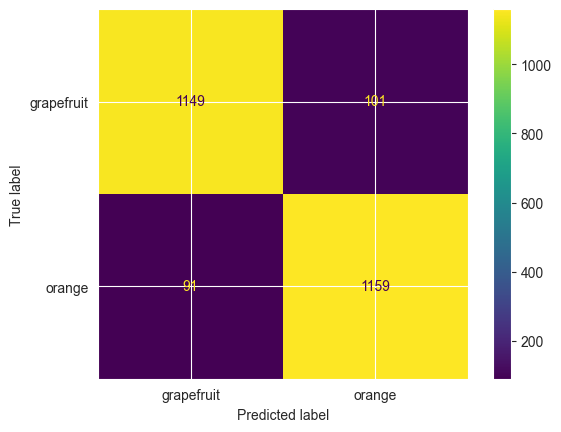

In [14]:
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.metrics import accuracy_score

y_true = pd.read_csv('test_Y_true.csv')
y_true

print('accuracy :', accuracy_score(y_true, y_predict))

ConfusionMatrixDisplay.from_predictions(y_true, y_predict);